In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, time

import warnings
warnings.filterwarnings('ignore')

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/1_reformat/phase_III/behavior/divide_into_two


### Reformat LPR behavioral data

In [4]:
########## mac
complete_input_file_path= '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/original/behavior/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23.csv'

########## constance

behav_all_data = pd.read_csv(complete_input_file_path, header = 0)
display(len(np.unique(behav_all_data['chemical.id'])))
display(behav_all_data.head())

215

,chemical.id,bottle.id,conc,plate.id,well,variable,value
0,234,NTP DNT 91-A1,0.0,14389,H01,t0,17.223000
1,234,NTP DNT 91-A1,0.0,14389,H02,t0,12.876000
2,234,NTP DNT 91-A1,0.0,14389,H03,t0,24.156000
3,234,NTP DNT 91-A1,0.0,14389,H04,t0,31.421999
4,234,NTP DNT 91-A1,0.0,14389,H05,t0,36.917999


In [5]:
# Keep only relevant columns
columns_to_keep = ['chemical.id', 'conc', 'plate.id', 'well', 'variable', 'value']
behav_all_data_select = behav_all_data.loc[:,columns_to_keep]
behav_all_data_select.head()

,chemical.id,conc,plate.id,well,variable,value
0,234,0.0,14389,H01,t0,17.223000
1,234,0.0,14389,H02,t0,12.876000
2,234,0.0,14389,H03,t0,24.156000
3,234,0.0,14389,H04,t0,31.421999
4,234,0.0,14389,H05,t0,36.917999


### Transpose time points

chemical_index:234
chemical_index:275
chemical_index:280
chemical_index:385
chemical_index:397
chemical_index:443
chemical_index:467
chemical_index:505
chemical_index:588
chemical_index:595
chemical_index:622
chemical_index:660
chemical_index:692
chemical_index:699
chemical_index:725
chemical_index:726
chemical_index:947
chemical_index:949
chemical_index:955
chemical_index:1016
chemical_index:1017
chemical_index:1031
chemical_index:1155
chemical_index:1174
chemical_index:1175
chemical_index:1178
chemical_index:1179
chemical_index:1182
chemical_index:1189
chemical_index:1209
chemical_index:1213
chemical_index:1214
chemical_index:1215
chemical_index:1216
chemical_index:1220
chemical_index:1222
chemical_index:1241
chemical_index:1312
chemical_index:1315
chemical_index:1371
chemical_index:1430
chemical_index:1595
chemical_index:1601
chemical_index:1607
chemical_index:1610
chemical_index:1611
chemical_index:1624
chemical_index:1626
chemical_index:1642
chemical_index:1651
chemical_index:1830

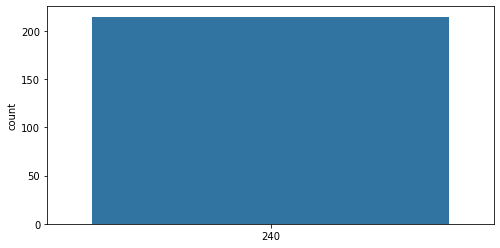

In [9]:
start_time = time.time()

behav_data_chemical_w_240_variables = pd.DataFrame()
behav_data_chemical_w_15_variables = pd.DataFrame()
    
len_variable = []
    
full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(behav_all_data['chemical.id'])     # all chemicals
else: # full_devel = "devel"
    chemical_id_from_here = np.unique([234])

    
for chemical_index in chemical_id_from_here:
    behav_data_chemical = behav_all_data_select.loc[behav_all_data['chemical.id'] == chemical_index,:]
    print("chemical_index:" + str(chemical_index))
    #print("len(behav_data_chemical):" + str(len(behav_data_chemical))) # for chemical.id=234, 69120

    if (len(np.unique(behav_data_chemical['variable'])) == 240):
        behav_data_chemical_w_240_variables = pd.concat([behav_data_chemical_w_240_variables, behav_data_chemical])
    else:
        behav_data_chemical_w_15_variables = pd.concat([behav_data_chemical_w_15_variables, behav_data_chemical])
    len_variable.append(len(np.unique(behav_data_chemical['variable'])))


end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# took 2 minutes for 2 chemicals

ds = pd.Series({"Column": len_variable})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)
plt.show()

In [ ]:
display(behav_data_chemical_w_240_endpoints)
display(behav_data_chemical_w_15_endpoints)

In [27]:
reformatted_data_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_w_240_endpoints.csv"
behav_data_chemical_w_240_endpoints.to_csv(reformatted_data_filename,index=False)

In [28]:
reformatted_data_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_w_15_endpoints.csv"
behav_data_chemical_w_15_endpoints.to_csv(reformatted_data_filename,index=False)

In [37]:
display(len(np.unique(behav_data_chemical_w_240_endpoints['chemical.id'])))

display(len(np.unique(behav_data_chemical_w_15_endpoints['chemical.id'])))

196

148